# Data Science - Big Data Technologies 24 📊🔍

## InfluxDB 📝

This notebook represents my submission for the first exam part in Big Data Technologies for the summer semester of 2024.

### Author 👥
- **Martin Brucker** (942815) 🧑‍💻

**Due**: 17.05.2024 at 23:59

**Contact Information**: martin.brucker@student.fh-kiel.de 📧

In [15]:
# !pip install influxdb client
import influxdb_client
import random
import time
import os

import matplotlib.pyplot as plt

from dotenv import load_dotenv
from influxdb_client import Point
from influxdb_client.client.write_api import SYNCHRONOUS

In [16]:
# getting the parameters from the .env file
load_dotenv()

token = os.getenv('INFLUXDB_ACCESS_TOKEN')
org = os.getenv('INFLUXDB_ORG')
url = os.getenv('INFLUXDB_URL')
bucket = os.getenv('INFLUXDB_BUCKET')

In [17]:
# creating the client
client = influxdb_client.InfluxDBClient(url=url, token=token, org=org)

In [18]:
# setup the write api object
write_api = client.write_api(write_options=SYNCHRONOUS)
   
# for loop to generate data and write data to the bucket
for value in range(100):
  point = (
    Point("Messstation Martin")
    .tag("location", "Kiel, Alte Eichen 6")
    .field("Temp", (random.randint(-8, 38)))
    .field("Humidity", (random.randint(0, 100)))
  )
  write_api.write(bucket=bucket, org=org, record=point)
  time.sleep(1) # separate points by 1 second


In [19]:
# setup the query api object
query_api = client.query_api()

# define filters for the query
query = """from(bucket: "weatherstation")
 |> range(start: -10m)
 |> filter(fn: (r) => r._measurement == "Messstation Martin")
 |> filter(fn: (r) => r._field == "Temp")"""

# retrieve the data from the bucket
tables = query_api.query(query, org="ServerTherapist")

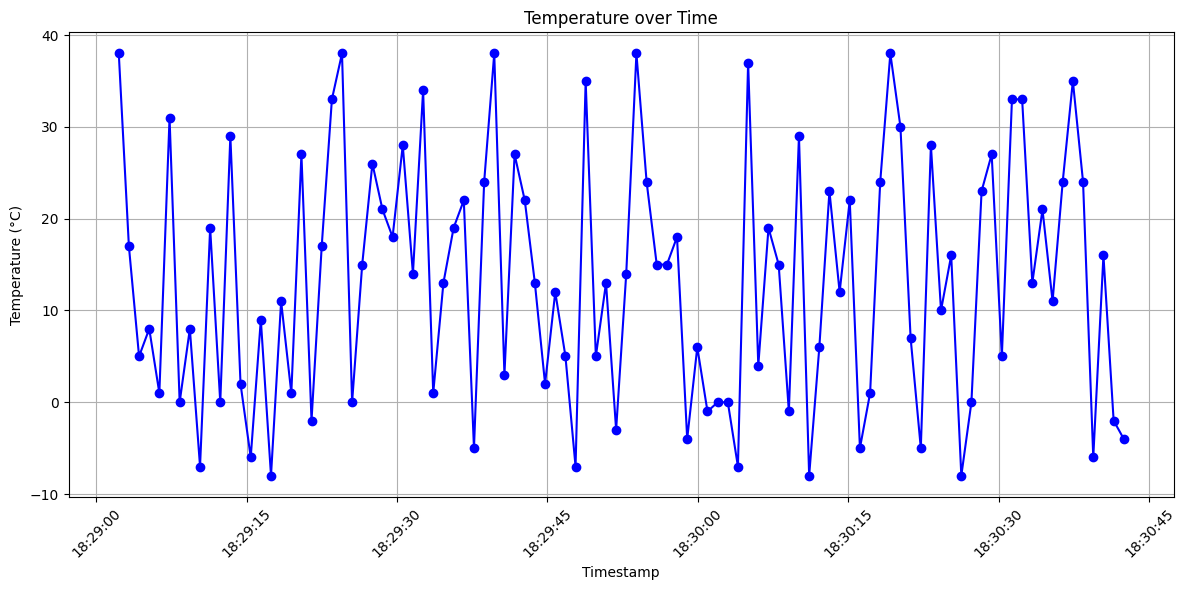

In [20]:
# Extract data into lists
timestamps = []
temperatures = []

for table in tables:
    for record in table.records:
        timestamps.append(record.get_time())
        temperatures.append(record.get_value())  # Fix: Access field values using record.values
        
# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(timestamps, temperatures, marker='o', linestyle='-', color='b')
plt.title('Temperature over Time')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()